In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
data = pd.read_csv(r'D:\Python\Kairiz TASK\train_and_test2.csv')
data

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
Cols = data.columns
for i in Cols:
    if data[i].sum() ==0:
        data = data.drop(i,axis=1)
        
data = data.drop( ['Passengerid' ],axis=1)

In [5]:
data  = data.fillna(0)
data.isnull().sum()


Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
2urvived    0
dtype: int64

In [6]:
data.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.490451,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.816089,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


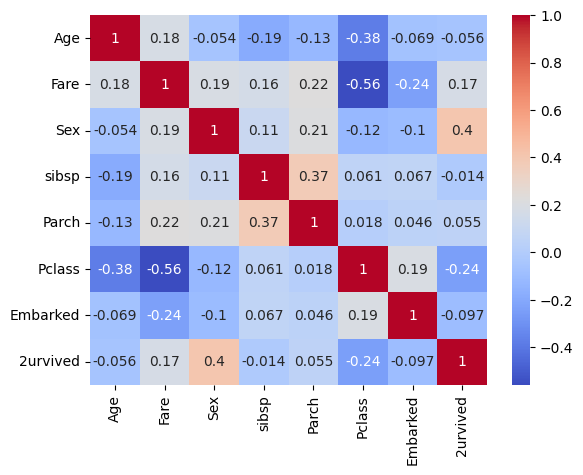

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
data.shape

(1309, 8)

In [10]:
class Logistic:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.m = None
        self.b = None

    def _sigmoid(self, x):
        return np.exp(-np.logaddexp(0, -x))

    def train(self, X, y):
        if self.m is None:
            self.m = np.zeros(X.shape[1])
        if self.b is None:
            self.b = 0

        X = X.to_numpy()
        y = y.to_numpy()
        # print(type(X))
        # print(type(y))
        self.m, self.b = logistic_regression_njit(X, y, self.m, self.b, self.lr, self.n_iters)


    def predict(self, X):
        y_pred = np.dot(X, self.m) + self.b
        logistic = self._sigmoid(y_pred)

        # print(logistic)
        predictions = [1 if i > 0.2194299  else 0 for i in logistic]
        return predictions
    
    
    def setThreshold(self, X, Y):
      y_pred = np.dot(X, self.m) + self.b
      logistic = self._sigmoid(y_pred)

      threshold = 0.2194299 
      Y = np.array(Y)

      for _ in range(10000):
          PredictionList = (logistic > threshold).astype(int)

          FalsePositive = np.sum((Y == 0) & (PredictionList == 1))
          FalseNegative = np.sum((Y == 1) & (PredictionList == 0))

          if FalsePositive > FalseNegative:
              threshold += 0.00001  # Decrease threshold to reduce false positives
          elif FalsePositive < FalseNegative:
              threshold -= 0.00001  # Increase threshold to reduce false negatives
          else:
              print("System Perfected")
              break

      print("Threshold:", threshold, FalsePositive, FalseNegative)
      print(np.mean(logistic))
      return threshold
  

In [11]:
from numba import njit

@njit
def logistic_regression_njit(X, y, m, b, lr, n_iters):
    n_samples, n_features = X.shape
    for _ in range(n_iters):
        y_pred = np.dot(X, m) + b
        logistic = 1 / (1 + np.exp(-y_pred))

        dw = (1/n_samples) * np.dot(X.T, (logistic - y))
        db = (1/n_samples) * np.sum(logistic - y)

        m -= lr * dw
        b -= lr * db

    return m, b

In [12]:

TotalSamples = data.shape[0]
TotalTrain = int(TotalSamples * 0.7)
TotalTrain
StartingIndex = TotalSamples - TotalTrain

TrainSamples = data[StartingIndex:]
TrainSamplesX = TrainSamples.iloc[:, :7]
TrainSamplesY = TrainSamples['2urvived']
TrainSamples


TestSamples = data[:StartingIndex]
TestSamples

TestSamplesX = TestSamples.iloc[:, :7]
TestSamplesY = TestSamples['2urvived']



In [ ]:
Model = Logistic(0.0001, 100000000)
Model.train(TrainSamplesX, TrainSamplesY)

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(Model, file)

print("Model saved successfully.")

In [56]:
t = Model.setThreshold(TestSamplesX, TestSamplesY)

System Perfected
Threshold: 0.2194299 42 42
0.21017119618372537


In [14]:
import pickle

# Load the model
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")

pred = loaded_model.predict(TestSamplesX)
# pred = Model.predict(TestSamplesX)

print("Predicted",pred)
listTestSamplesY = list(TestSamplesY)
print("Actual   ",listTestSamplesY)


#--------------------------- PRECISION -----------------------------
TruePositive = 0
FalsePositive = 0

for index, i in enumerate(pred):
    if i == 1 and listTestSamplesY[index] == 1:
        TruePositive += 1
    elif i == 1 and listTestSamplesY[index] == 0:
        FalsePositive += 1

# Calculate precision for class 1
precision = TruePositive / (TruePositive + FalsePositive)
print("Precision:", precision * 100)


# ______________________________ RECALL ____________________________
TruePositive = 0
FalseNegative = 0

for index, i in enumerate(pred):
    if i == 1 and listTestSamplesY[index] == 1:
        TruePositive += 1
    elif i == 0 and listTestSamplesY[index] == 1:
        FalseNegative += 1

recall = TruePositive / (TruePositive + FalseNegative)
print("Recall:", recall * 100)


#--------------------------- F1 SCORE -----------------------------
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_score * 100)


#--------------------------- Accuracy -----------------------------
accuracy = (np.sum(pred == TestSamplesY) / len(TestSamplesY)) * 100
print("Accuracy:", accuracy)

Model loaded successfully.


AttributeError: 'dict' object has no attribute 'predict'

# Precision: 71.02272727272727
# Recall: 81.16883116883116
# F1 Score: 75.75757575757576
# Accuracy: 79.64376590330788
# 0.2157089
# Logistic(0.0001, 1000000)

In [57]:
# print('Index', 'Actual', 'Predicted')       0.21943000000001944 0.2173199
# for index, i in enumerate(pred):
#     if i != TestSamplesY[index]:
        # print(index, '   ',i, '     ',TestSamplesY[index])
        
        
        
FalseNegative = 0
FalsePositive = 0

for index, i in enumerate(pred):
    if i == 1 and listTestSamplesY[index] == 0:
        FalsePositive += 1
    elif i == 0 and listTestSamplesY[index] == 1:
        FalseNegative += 1
        
print("Total 0\'","  Total 1\'", "  Total", '   T. wrong', '  wrong %')
print('  ', FalseNegative, '     ',FalsePositive, '       ', len(pred), '     ', FalsePositive + FalseNegative, '     ', round(((FalsePositive + FalseNegative) * 100)/ len(pred))  )

Total 0'   Total 1'   Total    T. wrong   wrong %
   42       42         393       84       21
